In [1]:
import os
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import packages.definitions as d

files = os.listdir(d.PLL_DATA_DIR)
paths = [f"{d.PLL_DATA_DIR}/{x}" for x in files]

def path_to_df(path: str) -> pd.DataFrame:
    date_str = os.path.splitext(os.path.basename(path))[0]
    df = pd.read_json(path)
    df["date"] = dt.datetime.strptime(date_str, "%Y-%m-%d")
    return df

dfs = [path_to_df(x) for x in paths]
df = pd.concat(dfs).reset_index(drop=True)

stat = df.groupby("pll")["time"].describe()
stat.sort_values("50%")


,count,mean,std,min,25%,50%,75%,max
pll,,,,,,,,
T,33.0,5.041818,2.045679,3.99,4.3900,4.640,5.0400,16.13
Ua,39.0,5.164359,1.582970,3.15,4.3250,4.650,5.7650,11.48
Y,25.0,5.507600,1.272646,3.65,4.5700,5.500,6.1400,9.41
H,29.0,6.846207,4.981432,4.23,5.4400,5.730,6.6400,32.24
Jb,35.0,6.089429,1.288213,4.21,5.3100,5.850,6.5800,9.98
F,28.0,6.017500,1.132933,4.57,5.1875,5.865,6.5400,9.48
Ab,32.0,5.978438,0.889712,4.57,5.3875,5.920,6.4175,8.90
Ub,32.0,6.948125,6.579605,4.03,4.9025,6.040,6.5225,42.52
Aa,44.0,6.348636,1.178291,4.63,5.6425,6.055,6.8125,10.29


## latest

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

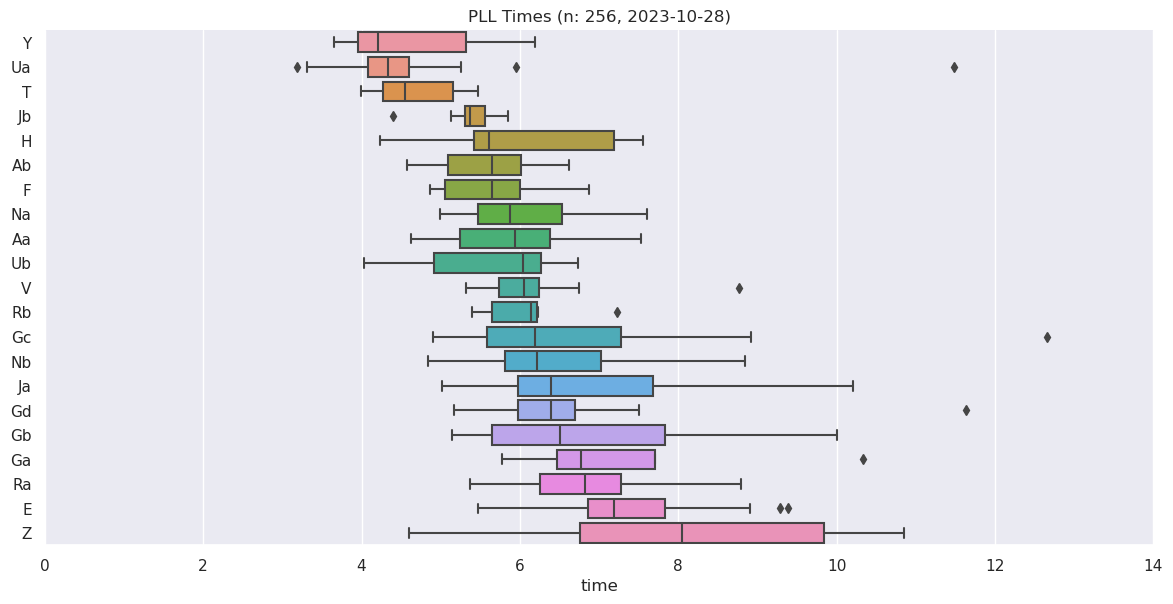

In [7]:
latest_date = df["date"].max()
df_latest = df[df["date"] == latest_date]

sns.set_theme()

g = sns.catplot(
    data=df_latest,
    x="time",
    y="pll",
    order=df_latest.groupby("pll")["time"].describe().sort_values("50%").index,
    kind="box",
    height=6,
    aspect=2,
)

g.set(
  title=f"PLL Times (n: {len(df_latest)}, {latest_date.date()})",
  ylabel="",
  xlim=(0, 14),
)

plt.show()


## full

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

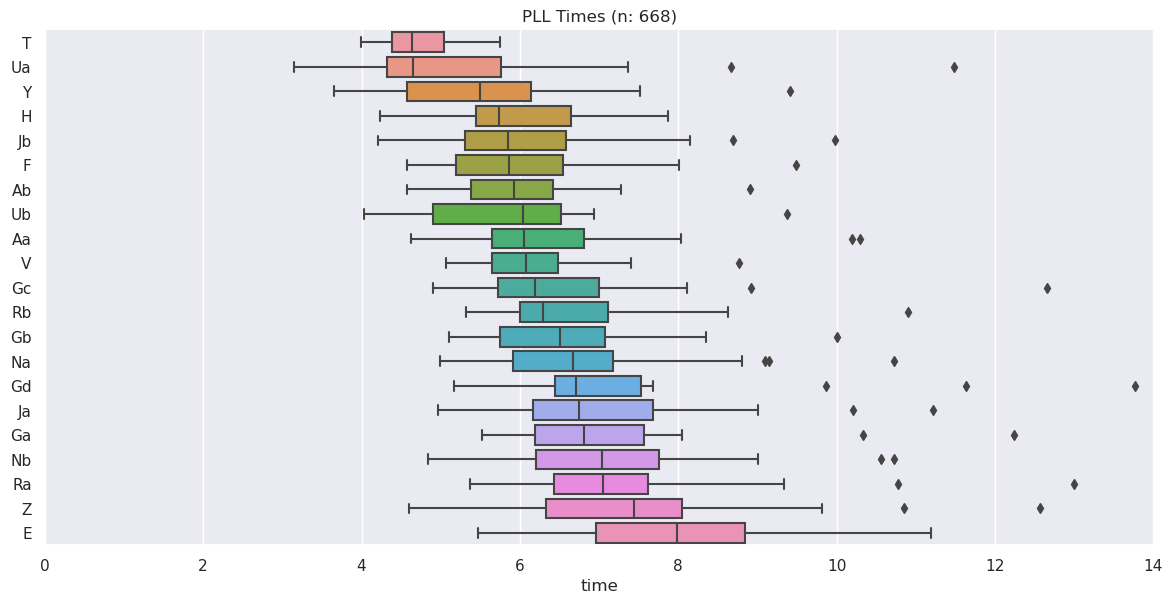

In [6]:
sns.set_theme()

g = sns.catplot(
    data=df,
    x="time",
    y="pll",
    order=df.groupby("pll")["time"].describe().sort_values("50%").index,
    kind="box",
    height=6,
    aspect=2,
)

g.set(
  title=f"PLL Times (n: {len(df)})",
  ylabel="",
  xlim=(0, 14),
)

plt.show()


## transition

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

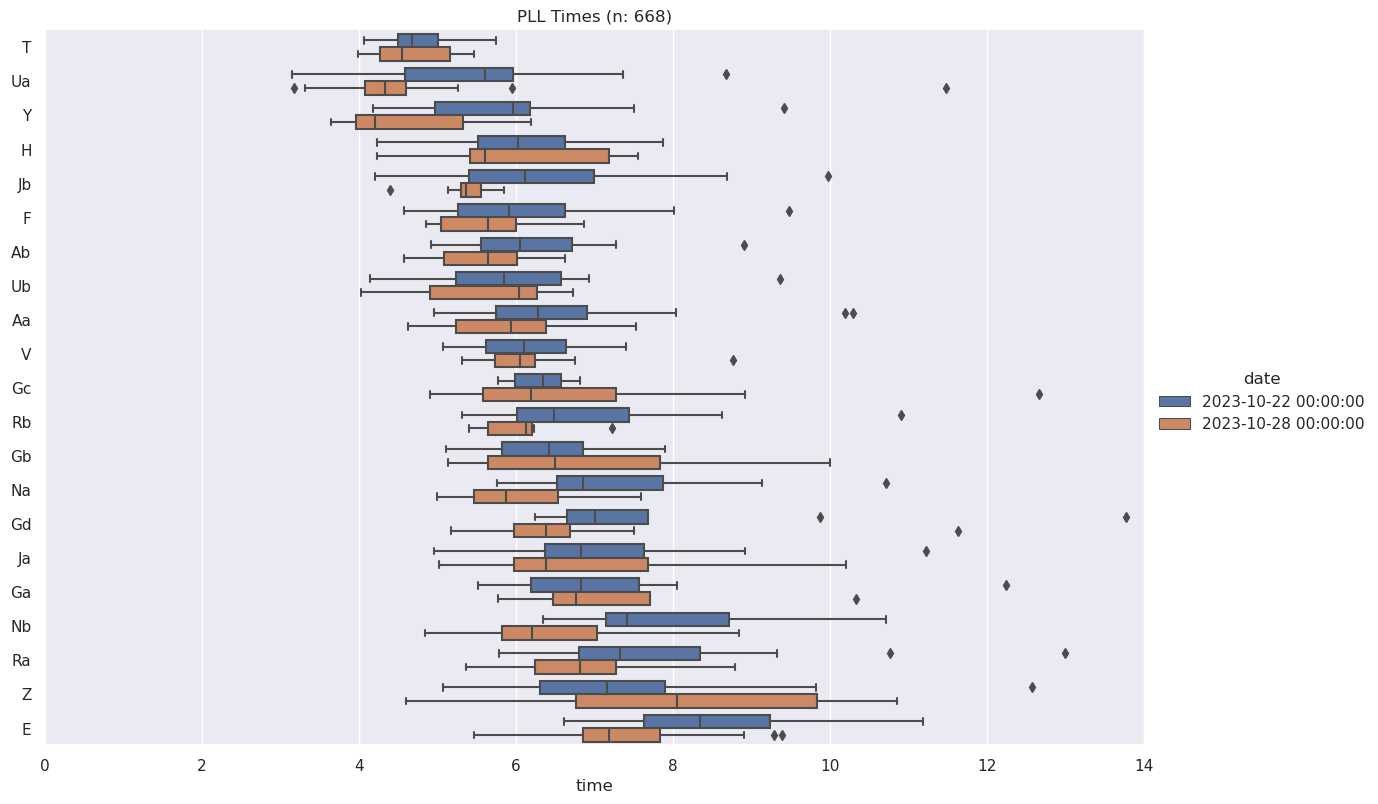

In [8]:
sns.set_theme()

g = sns.catplot(
    data=df,
    x="time",
    y="pll",
    order=df.groupby("pll")["time"].describe().sort_values("50%").index,
    hue="date",
    kind="box",
    height=8,
    aspect=1.5,
)

g.set(
  title=f"PLL Times (n: {len(df)})",
  ylabel="",
  xlim=(0, 14),
)

plt.show()
